<a href="https://colab.research.google.com/github/keisycascante/QM206/blob/main/Parcial_N%C2%B01_QM206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parcial 1 - QM 206
Keisy Cascante

1. Función para calcular molaridad


Ejemplo: Molaridad de NaCl

In [ ]:
import numpy as np

def calculate_molarity(grams=None, moles=None, volume=None, volume_unit="L", molecular_weight=None):
    """
    Calculate the molarity of a solution.

    Parameters:
    grams (float): The mass of the solute in grams. Either 'grams' or 'moles' must be provided.
    moles (float): The number of moles of solute. Either 'grams' or 'moles' must be provided.
    volume (float): The volume of the solution.
    volume_unit (str): The unit of volume, either "L" for liters or "mL" for milliliters. Default is "L".
    molecular_weight (float): The molecular weight of the solute (required if 'grams' is provided).

    Returns:
    float: Molarity of the solution.
    """

    if grams is None and moles is None:
        raise ValueError("Either 'grams' or 'moles' must be provided.")
    if grams is not None and (molecular_weight is None):
        raise ValueError("Molecular weight must be provided when grams are given.")
    if volume is None or volume <= 0:
        raise ValueError("Volume must be provided and greater than zero.")


    if grams is not None:
        moles = np.divide(grams, molecular_weight)


    if volume_unit == "mL":
        volume = np.divide(volume, 1000)
    elif volume_unit != "L":
        raise ValueError("Invalid volume unit. Use 'L' for liters or 'mL' for milliliters.")


    molarity = np.divide(moles, volume)
    return molarity

Ejemplo 1:
¿Cuál es la molaridad de una solución que contiene 5.5 g de HCl (masa molar = 36.5 g/mol) disueltos en suficiente agua para formar 250 mL de solución?

In [ ]:
grams_of_solute = 5.5
molecular_weight = 36.5
volume_of_solution = 250

molarity = calculate_molarity(grams=grams_of_solute, volume=volume_of_solution, volume_unit="mL", molecular_weight=molecular_weight)
print("Molarity of the solution:", molarity, "M")



Molarity of the solution: 0.6027397260273972 M


2. Función para calcular el pH de una solución de ácido fuerte

In [ ]:
import numpy as np

def calculate_ph(H):
    """
    Calculate the pH of a strong acid solution.

    Parameters:
    H (float): The concentration of hydrogen ions [H+] in mol/L.

    Returns:
    float: pH of the solution.
    """
    if H <= 0:
        raise ValueError("The hydrogen ion concentration must be greater than zero.")

    # Calculate pH
    pH = -np.log10(H)
    return pH

Ejemplo 2:
Calcular el pH de una solución de HCl 0.001 M

In [ ]:
H = 0.001
pH = calculate_ph(H)
print("pH of the solution:", pH)


pH of the solution: 3.0


3. Función para calcular la masa molar de un gas ideal

In [ ]:
import numpy as np

def calculate_molar_mass(mass, pressure, volume, temperature_C):
    """
    Calculate the molar mass of an ideal gas.

    Parameters:
    mass (float): Mass of the gas in grams.
    pressure (float): Pressure of the gas in atm.
    volume (float): Volume of the gas in liters.
    temperature_C (float): Temperature in degrees Celsius.

    Returns:
    float: Molar mass of the gas in g/mol.
    """

    temperature_K = temperature_C + 273.15
    R = 0.0821

    return np.divide(mass * R * temperature_K, pressure * volume)



Ejemplo 3: Una masa de hidrógeno gaseoso ocupa un volumen de 230 mL en un tanque a una presión de 1 atm y a una temperatura de 35°C.

In [ ]:
mass = 1
pressure = 1.0
volume = 230
temperature_C = 35

molar_mass = calculate_molar_mass(mass, pressure, volume, temperature_C)

print(f"The molar mass of the gas is: {molar_mass:.2f} g/mol")


The molar mass of the gas is: 0.11 g/mol


4. Función para calcular las concentraciones del ácido y base conjugada para la preparación de un buffer

In [ ]:
import numpy as np

def calculate_buffer_concentrations(desired_ph, pKa, volume_mL, total_concentration):
    """
    Calculate the concentrations of the conjugate base and weak acid for a buffer solution.

    Parameters:
    desired_ph (float): The desired pH of the buffer.
    pKa (float): The pKa of the weak acid.
    volume_mL (float): The volume of the solution in mL.
    total_concentration (float): Total concentration of the buffer (sum of acid and base) in mol/L.

    Returns:
    tuple: Required concentrations (mol/L) of conjugate base [A-] and weak acid [HA].
    """

    ratio = 10 ** (desired_ph - pKa)


    ha_concentration = total_concentration / (1 + ratio)
    a_concentration = total_concentration - ha_concentration


    volume_L = volume_mL / 1000


    ha_moles = ha_concentration * volume_L
    a_moles = a_concentration * volume_L

    return ha_concentration, a_concentration, ha_moles, a_moles


Ejemplo 4: Calcular las concentraciones de NH4OH Y NH4Cl para la preparacrión de un buffer a pH 10, con un pKa de 9.25 en 500 mL.

In [ ]:
desired_ph = 10
pKa = 9.25
volume_mL = 500
total_concentration = 0.1

ha_concentration, a_concentration, ha_moles, a_moles = calculate_buffer_concentrations(
    desired_ph, pKa, volume_mL, total_concentration
)

print("Weak acid [HA] concentration:", ha_concentration, "M")
print("Conjugate base [A-] concentration:", a_concentration, "M")

Weak acid [HA] concentration: 0.01509795572113233 M
Conjugate base [A-] concentration: 0.08490204427886767 M


5. Función para calcular la energía liberada de una reacción química

In [ ]:
def calculate_reaction_energy(moles, delta_h):
    """
    Calculate the energy released or absorbed in a chemical reaction.

    Parameters:
    moles (float): The number of moles of the reagent.
    delta_h (float): The enthalpy change of formation (ΔH) in kJ/mol.

    Returns:
    float: The energy released or absorbed in kJ.
    """

    energy = moles * delta_h
    return energy

Ejemplo 5: El cambio de entalpía de formación (Δ𝐻) para H2O es −285,8 kJ/mol. Calcule la energía liberada cuando se forman 5 moles de agua.

In [ ]:
moles_of_reagent = 5
delta_h_of_formation = -285.8

energy_released = calculate_reaction_energy(moles_of_reagent, delta_h_of_formation)
print("Energy released in the reaction:", energy_released, "kJ")


Energy released in the reaction: -1429.0 kJ


6. Función para calcular el rendimiento porcentual.

In [ ]:
def calculate_percentage_yield(actual_yield, theoretical_yield):
    """
    Calculate the percentage yield of a reaction.

    Parameters:
    actual_yield (float): The actual yield of the product in grams.
    theoretical_yield (float): The theoretical yield of the product in grams.

    Returns:
    float: The percentage yield of the reaction.
    """
    if theoretical_yield == 0:
        raise ValueError("Theoretical yield must be greater than zero.")

    percentage_yield = (actual_yield / theoretical_yield) * 100
    return percentage_yield

Ejemplo 6: Calcular el rendimiento porcentual de la grasa de patacones obtenida mediante la extracción Soxhlet; teniendo como masa teórica 25.4 g y masa experimental 4.3g.

In [ ]:
actual_yield = 4.3
theoretical_yield = 25.4

yield_percentage = calculate_percentage_yield(actual_yield, theoretical_yield)

print(f"Percentage yield: {yield_percentage:.2f}%")

Percentage yield: 16.93%


7. Función para calcular el calor específico de un metal

In [ ]:
def calculate_specific_heat(heat_energy, mass, initial_temp, final_temp):
    """
    Calculate the specific heat of a substance.

    Parameters:
    heat_energy (float): The amount of heat energy absorbed or released in calories.
    mass (float): The mass of the substance in grams.
    initial_temp (float): The initial temperature in degrees Celsius.
    final_temp (float): The final temperature in degrees Celsius.

    Returns:
    float: Specific heat capacity in cal/g°C.
    """

    delta_t = final_temp - initial_temp


    specific_heat = heat_energy / (mass * delta_t)
    return specific_heat

Ejemplo 7: Determine el calor específico de una pieza de 720.325 gramos que requiere 2300 calorias para elevar su temperatura de 37°C a 140°C.

In [ ]:
heat_energy = 2300
mass = 720.325
initial_temp = 37
final_temp = 140

specific_heat = calculate_specific_heat(heat_energy, mass, initial_temp, final_temp)
print("Specific heat of the substance:", specific_heat, "cal/g°C")

Specific heat of the substance: 0.031000030663073806 cal/g°C


8. Función para calcular la presión osmótica a 25°C

In [ ]:
def calculate_osmotic_pressure(concentration_gL, molecular_weight, temperature_C=25):

    # Calculate molarity from concentration in g/L and molecular weight
    molarity = concentration_gL / molecular_weight

    # Convert temperature to Kelvin
    temperature_K = temperature_C + 273.15
    R = 0.0821  # Ideal gas constant in L atm / (K mol)

    # Calculate osmotic pressure
    osmotic_pressure = molarity * R * temperature_K
    return osmotic_pressure

Ejemplo 8: Calcular la presión osmótica del cloruro de sodio (NaCl) con: Concentración: 58,5 g/L, Peso molecular: 58,44 g/mol, Temperatura: 25 °C.

In [ ]:
concentration_gL = 58.5
molecular_weight = 58.44

osmotic_pressure = calculate_osmotic_pressure(concentration_gL, molecular_weight)

print(f"Osmotic pressure: {osmotic_pressure:.2f} atm")



Osmotic pressure: 24.50 atm


9. Función para calcular el producto de solubilidad de una sal insoluble

In [ ]:
def calculate_ksp(solubility, m, n):
    """
    Calculate the Ksp of an insoluble salt.

    Parameters:
    solubility (float): The molar solubility of the salt in mol/L.
    m (int): The stoichiometric coefficient of the cation.
    n (int): The stoichiometric coefficient of the anion.

    Returns:
    float: The Ksp value.
    """

    a_concentration = m * solubility
    b_concentration = n * solubility


    ksp = (a_concentration ** m) * (b_concentration ** n)
    return ksp


$$ CaCO
3
​
 ↔Ca
2+
 +CO
3
2−
​
 $$
Si la solubilidad (𝑠) de CaCO3 es 𝑠 = 5,0 × 1 0 − 6. Calcular Kps

In [ ]:
solubility = 5.0e-6
m = 1
n = 1

ksp = calculate_ksp(solubility, m, n)
print("Ksp of CaCO3:", ksp)

Ksp of CaCO3: 2.5000000000000004e-11


10. Función para calcular el punto de equivalencia de una reacción de neutralización

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def titration_curve(strong_acid_conc, strong_base_conc, volume_acid, volume_added_points):
    """
    Calculate the pH at each point in the titration of a strong acid with a strong base.

    Parameters:
    strong_acid_conc (float): Molarity of the strong acid (HCl).
    strong_base_conc (float): Molarity of the strong base (NaOH).
    volume_acid (float): Volume of the acid in liters.
    volume_added_points (array): Volumes of base added in liters.

    Returns:
    DataFrame: pH values and volume of base added.
    """
    initial_moles_acid = strong_acid_conc * volume_acid
    pH_values = []

    for volume_base in volume_added_points:
        moles_base_added = strong_base_conc * volume_base
        moles_H_plus = initial_moles_acid - moles_base_added

        if moles_H_plus > 0:
            concentration_H_plus = moles_H_plus / (volume_acid + volume_base)
            pH = -np.log10(concentration_H_plus)
        elif moles_H_plus < 0:
            excess_moles_OH = -moles_H_plus
            concentration_OH = excess_moles_OH / (volume_acid + volume_base)
            pOH = -np.log10(concentration_OH)
            pH = 14 - pOH
        else:
            pH = 7

        pH_values.append(pH)

    data = pd.DataFrame({"Volume Base Added (L)": volume_added_points, "pH": pH_values})
    return data

Ejemplo 10: calcular el punto de equivalencia de una reacción de neutralización entre HCl 0.1M y NaOH 0.1M.

Equivalence Point: Volume of base added = 0.05 L, pH = 10.70


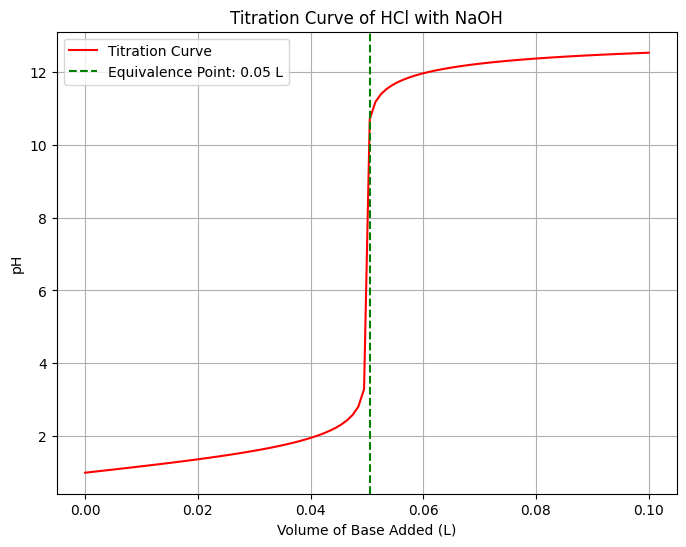

In [ ]:
strong_acid_conc = 0.1
strong_base_conc = 0.1
volume_acid = 0.05
volume_base_added = np.linspace(0, 0.1, 100)

titration_data = titration_curve(strong_acid_conc, strong_base_conc, volume_acid, volume_base_added)

equivalence_point_index = np.abs(titration_data["pH"] - 7).idxmin()
equivalence_volume = titration_data["Volume Base Added (L)"][equivalence_point_index]
equivalence_pH = titration_data["pH"][equivalence_point_index]

print(f"Equivalence Point: Volume of base added = {equivalence_volume:.2f} L, pH = {equivalence_pH:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(titration_data["Volume Base Added (L)"], titration_data["pH"], label="Titration Curve", color="red")
plt.axvline(equivalence_volume, color="green", linestyle="--", label=f"Equivalence Point: {equivalence_volume:.2f} L")
plt.xlabel("Volume of Base Added (L)")
plt.ylabel("pH")
plt.title("Titration Curve of HCl with NaOH")
plt.legend()
plt.grid()
plt.show()